In [75]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [76]:
office_episodes = pd.read_csv('office_episodes.csv')

In [77]:
office_episodes.head()

,episode_number,season,episode_title,description,ratings,votes,viewership_mil,duration,release_date,guest_stars,director,writers,has_guests,scaled_ratings
0,0,1,Pilot,The premiere episode introduces the boss and s...,7.5,4936,11.2,23,2005-03-24,NaN,Ken Kwapis,Ricky Gervais |Stephen Merchant and Greg Daniels,False,0.28125
1,1,1,Diversity Day,Michael's off color remark puts a sensitivity ...,8.3,4801,6.0,23,2005-03-29,NaN,Ken Kwapis,B. J. Novak,False,0.53125
2,2,1,Health Care,Michael leaves Dwight in charge of picking the...,7.8,4024,5.8,22,2005-04-05,NaN,Ken Whittingham,Paul Lieberstein,False,0.37500
3,3,1,The Alliance,"Just for a laugh, Jim agrees to an alliance wi...",8.1,3915,5.4,23,2005-04-12,NaN,Bryan Gordon,Michael Schur,False,0.46875
4,4,1,Basketball,Michael and his staff challenge the warehouse ...,8.4,4294,5.0,23,2005-04-19,NaN,Greg Daniels,Greg Daniels,False,0.56250


In [78]:
colors = []

for lab, row in office_episodes.iterrows():
    if row['scaled_ratings'] < 0.25:
        colors.append('red')
    elif row['scaled_ratings'] < 0.50:
        colors.append('orange')
    elif row['scaled_ratings'] < 0.75:
        colors.append('lightgreen')
    else:
        colors.append('darkgreen')

In [79]:
print(colors)

['orange', 'lightgreen', 'orange', 'orange', 'lightgreen', 'orange', 'lightgreen', 'orange', 'lightgreen', 'lightgreen', 'orange', 'orange', 'lightgreen', 'orange', 'lightgreen', 'lightgreen', 'lightgreen', 'darkgreen', 'lightgreen', 'orange', 'orange', 'lightgreen', 'lightgreen', 'lightgreen', 'orange', 'lightgreen', 'lightgreen', 'darkgreen', 'darkgreen', 'orange', 'lightgreen', 'orange', 'orange', 'orange', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'orange', 'orange', 'lightgreen', 'lightgreen', 'darkgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'darkgreen', 'darkgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'orange', 'lightgreen', 'darkgreen', 'orange', 'lightgreen', 'lightgreen', 'orange', 'darkgreen', 'lightgreen', 'lightgreen', 'orange', 'orange', 'orange', 'lightgreen', 'orange', 'lightgreen', 'lightgreen', 'lightgreen', 'lightgreen', 'orange', 'darkgreen', 'orange', 'orang

In [80]:
sizes = []

for lab, row in office_episodes.iterrows():
    if row['has_guests'] == False:
        sizes.append(25)
    else:
        sizes.append(250)

In [81]:
office_episodes['colors'] = colors
office_episodes['sizes'] = sizes

In [82]:
non_guest_df = office_episodes[office_episodes['has_guests'] == False]
guest_df = office_episodes[office_episodes['has_guests'] == True]

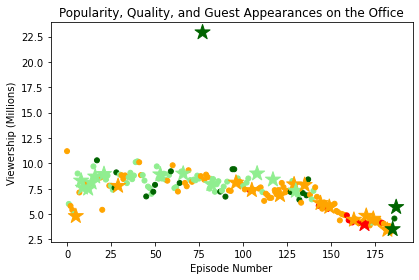

In [86]:
fig = plt.figure ()
plt.scatter(x=non_guest_df['episode_number'], y=non_guest_df['viewership_mil'],c=non_guest_df.colors,s=25)
plt.scatter(x=guest_df['episode_number'], y=guest_df['viewership_mil'], c=guest_df['colors'], s=250,marker='*')
plt.title('Popularity, Quality, and Guest Appearances on the Office')
plt.xlabel('Episode Number')
plt.ylabel('Viewership (Millions)')
plt.show()

In [90]:
office_episodes[office_episodes['viewership_mil'] > 20]['guest_stars']

77    Cloris Leachman, Jack Black, Jessica Alba
Name: guest_stars, dtype: object